<a href="https://colab.research.google.com/github/JokaDPiero/Face-Mask-Detection-using-keras-and-opencv/blob/main/FaceMaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = plt.imread("/content/Materials/mask.jpg")

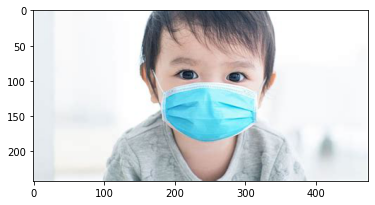

In [ ]:
plt.imshow(img)

In [ ]:
img

array([[[250, 255, 255],
        [248, 253, 255],
        [245, 250, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[247, 252, 255],
        [244, 249, 253],
        [241, 246, 250],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[243, 248, 252],
        [240, 245, 249],
        [237, 242, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[229, 234, 238],
        [226, 231, 235],
        [223, 228, 232],
        ...,
        [237, 243, 243],
        [244, 250, 250],
        [244, 250, 250]],

       [[225, 230, 234],
        [234, 239, 243],
        [228, 233, 237],
        ...,
        [245, 249, 250],
        [251, 255, 255],
        [242, 246, 247]],

       [[225, 230, 234],
        [234, 239, 243],
        [228, 233, 237],
        ...,
        [245, 249, 250],
        [251, 255, 255],
        [242, 246, 247]]

In [ ]:
img.shape

(242, 474, 3)

In [ ]:
import cv2
from keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
#loading the pre-trained model
model = load_model("/content/Materials/mask_recog_ver2 (1).h5")
results={
    0:'Without Mask',
    1:'Mask'
}

color={
    0:(255,0,0),
    1:(0,255,0)
}

In [ ]:
#resizing the image for better plotting
img=cv2.resize(img,(450,250))

facecascade=cv2.CascadeClassifier("/content/Materials/haarcascade_frontalface_alt.xml")

In [ ]:
faces = facecascade.detectMultiScale(img)
faces

array([[152,  28, 180, 180]], dtype=int32)

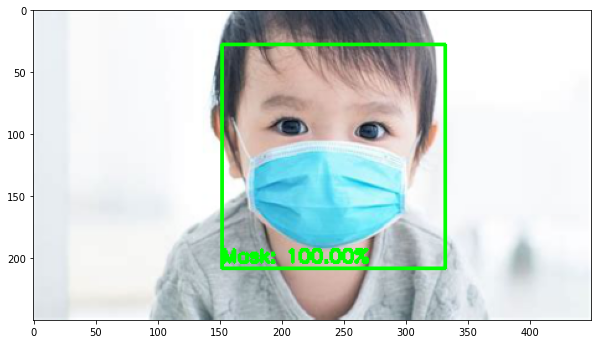

In [ ]:
face_list=[]
preds=[]
# Plot rectangle around all the faces
for (x,y,w,h) in faces:
        
        face_img = img[y:y+h, x:x+w]
        #as the model is trained in RGB images, we convert the frames to RGB
        face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
        #as the model is trained in images resesized to 224x224 px , we resize the frames
        face_img = cv2.resize(face_img, (224, 224))  
        #converting to float32 and making it 3-D
        face_img = img_to_array(face_img)
        #as frame is 3-D we increase its dimension to make it compatible with model
        face_img = np.expand_dims(face_img, axis=0)
        #normalise it
        face_img =  preprocess_input(face_img)
        #storing the output
        face_list.append(face_img)

        if len(face_list)>0:
            preds = model.predict(face_list)
        #mask contain probabily of wearing a mask and vice versa
        for pred in preds:
            (mask,withoutMask) = pred 
        
        if mask > withoutMask:
            idx=1
        else:
            idx=0
        
        #creating the text format
        label = "{}: {:.2f}%".format(results[idx], max(mask, withoutMask) * 100)
        
        #putting the text below the rectangle
        cv2.putText(img, label, (x, y+h-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color[idx], 2)
        #creating the rectangle
        cv2.rectangle(img, (x, y), (x + w, y + h),color[idx], 2)
plt.figure(figsize=(10,10))
plt.imshow(img)

In [ ]:
img1 = plt.imread("/content/Materials/nomask1.jpg")

In [ ]:
img1

array([[[211, 205, 209],
        [211, 205, 209],
        [211, 205, 209],
        ...,
        [197, 192, 189],
        [197, 192, 189],
        [197, 192, 189]],

       [[211, 205, 209],
        [211, 205, 209],
        [211, 205, 209],
        ...,
        [197, 192, 189],
        [197, 192, 189],
        [197, 192, 189]],

       [[211, 205, 209],
        [211, 205, 209],
        [211, 205, 209],
        ...,
        [197, 192, 189],
        [197, 192, 189],
        [197, 192, 189]],

       ...,

       [[199, 193, 195],
        [199, 193, 195],
        [199, 193, 195],
        ...,
        [186, 181, 178],
        [185, 180, 177],
        [186, 181, 178]],

       [[199, 193, 195],
        [199, 193, 195],
        [199, 193, 195],
        ...,
        [186, 181, 178],
        [186, 181, 178],
        [186, 181, 178]],

       [[199, 193, 195],
        [199, 193, 195],
        [199, 193, 195],
        ...,
        [186, 181, 178],
        [187, 182, 179],
        [186, 181, 178]]

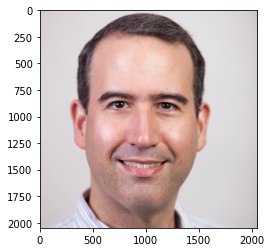

In [ ]:
plt.imshow(img1)

In [ ]:
img1.shape

(2048, 2048, 3)

In [ ]:
#resizing the image for better plotting
img1=cv2.resize(img1,(500,500))

In [ ]:
face=cv2.CascadeClassifier("/content/Materials/haarcascade_frontalface_alt.xml")
face1 = face.detectMultiScale(img1)
face1

array([[ 73,  91, 331, 331]], dtype=int32)

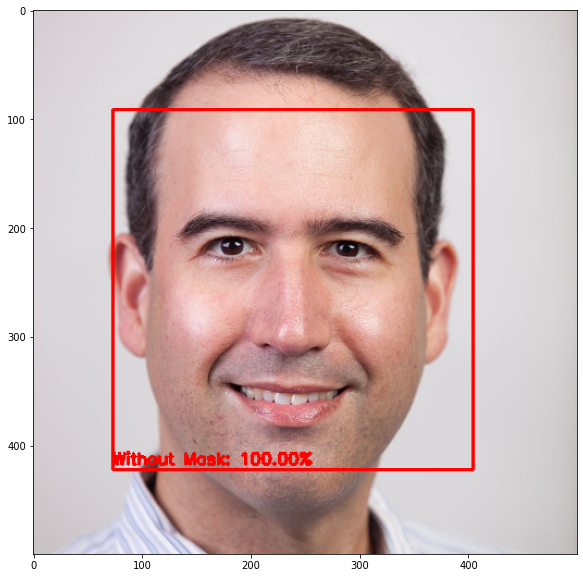

In [ ]:
face_list=[]
preds=[]
# Plot rectangle around all the faces
for (x,y,w,h) in face1:
        
        face_img = img1[y:y+h, x:x+w]
        #as the model is trained in RGB images, we convert the frames to RGB
        face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
        #as the model is trained in images resesized to 224x224 px , we resize the frames
        face_img = cv2.resize(face_img, (224, 224))  
        #converting to float32 and making it 3-D
        face_img = img_to_array(face_img)
        #as frame is 3-D we increase its dimension to make it compatible with model
        face_img = np.expand_dims(face_img, axis=0)
        #normalise it
        face_img =  preprocess_input(face_img)
        #storing the output
        face_list.append(face_img)

        if len(face_list)>0:
            preds = model.predict(face_list)
        #mask contain probabily of wearing a mask and vice versa
        for pred in preds:
            (mask,withoutMask) = pred 
        
        if mask > withoutMask:
            idx=1
        else:
            idx=0
        
        #creating the text format
        label = "{}: {:.2f}%".format(results[idx], max(mask, withoutMask) * 100)
        
        #putting the text below the rectangle
        cv2.putText(img1, label, (x, y+h-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color[idx], 2)
        #creating the rectangle
        cv2.rectangle(img1, (x, y), (x + w, y + h),color[idx], 2)
plt.figure(figsize=(10,10))
plt.imshow(img1)